In [186]:
from pandas import read_csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

# load the dataset
path = '/Users/peppermint/Desktop/codes/python/NetworkIntrusionDetection/Datasets/small_result230.csv'
df = read_csv(path)
df["Label"] = df["Label"].map(lambda x: 0 if x == "Benign" else 1)

In [187]:
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,52412,6,1.519359e+09,46,2,0,0,0,0,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0
1,52416,6,1.519359e+09,1,2,0,0,0,0,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0
2,443,6,1.519359e+09,117303745,12,10,1148,1471,517,0,...,20,79440.5,25166.637449,97236,61645,58533700.5,591071.265501,58951651,58115750,0
3,443,6,1.519359e+09,250,3,0,77,0,46,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0
4,52425,6,1.519359e+09,93,3,1,31,0,31,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0


In [188]:
df.tail()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
15096,80,6,1.519356e+09,46,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
15097,80,6,1.519383e+09,277,2,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
15098,80,6,1.519381e+09,331,2,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
15099,80,6,1.519355e+09,313,2,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
15100,80,6,1.519383e+09,190,2,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1


In [189]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)

In [190]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [191]:
# define the  model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(X_train, y_train, batch_size=16, epochs=50, shuffle=True, verbose=2, validation_data=(X_test,y_test))
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))
model.summary()

Epoch 1/50
633/633 - 3s - loss: 759844.0000 - accuracy: 0.9447 - val_loss: 404239.7812 - val_accuracy: 0.9743 - 3s/epoch - 5ms/step
Epoch 2/50
633/633 - 1s - loss: 833142.8750 - accuracy: 0.9453 - val_loss: 940395.7500 - val_accuracy: 0.9703 - 1s/epoch - 2ms/step
Epoch 3/50
633/633 - 2s - loss: 744884.1250 - accuracy: 0.9506 - val_loss: 820083.1875 - val_accuracy: 0.9703 - 2s/epoch - 3ms/step
Epoch 4/50
633/633 - 2s - loss: 527561.1250 - accuracy: 0.9551 - val_loss: 437131.8125 - val_accuracy: 0.9701 - 2s/epoch - 2ms/step
Epoch 5/50
633/633 - 1s - loss: 747984.1875 - accuracy: 0.9505 - val_loss: 783526.1875 - val_accuracy: 0.9781 - 1s/epoch - 2ms/step
Epoch 6/50
633/633 - 1s - loss: 577184.8125 - accuracy: 0.9584 - val_loss: 166221.5781 - val_accuracy: 0.9767 - 1s/epoch - 2ms/step
Epoch 7/50
633/633 - 1s - loss: 572388.5000 - accuracy: 0.9556 - val_loss: 195716.7188 - val_accuracy: 0.9699 - 1s/epoch - 2ms/step
Epoch 8/50
633/633 - 1s - loss: 504471.9688 - accuracy: 0.9581 - val_loss: 6

156/156 [==============================] - 0s 2ms/step


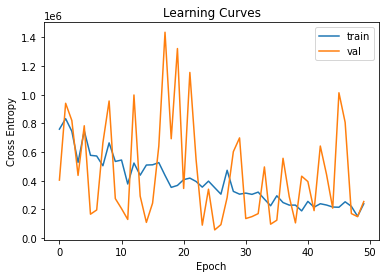

In [192]:
# predict test set
yhat = model.predict(X_test)
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [194]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat)
print('F1 score: %f' % f1)

Accuracy: 0.977528
Precision: 0.849558
Recall: 0.502618
F1 score: 0.631579


In [195]:
X_test.shape

(4984, 79)

In [196]:
X_test[0].shape

(79,)

In [197]:
model.predict(X_test[:10])

1/1 [==============================] - 0s 28ms/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [198]:
y_test[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [199]:
NUM_TO_CONSIDER = 10
correct = 0
for got, expected in zip(model.predict(X_test[:NUM_TO_CONSIDER]), y_test[:NUM_TO_CONSIDER]):
    if int(got[0]) == int(expected):
        print(f"correct: {int(got[0])} == {int(expected)}")
        correct += 1

total_score = correct / NUM_TO_CONSIDER
print(f"total score: {total_score}")


1/1 [==============================] - 0s 25ms/step
correct: 0 == 0
correct: 0 == 0
correct: 0 == 0
correct: 0 == 0
correct: 0 == 0
correct: 0 == 0
correct: 1 == 1
correct: 0 == 0
correct: 0 == 0
correct: 0 == 0
total score: 1.0


In [200]:
# predict on unseen data "manually"
from sklearn.preprocessing import LabelEncoder

# define a row of new data
row = [80,6,1519349387.0,56705690,203,104,56083,189900,680,0,276.2709359606,291.6989844299,1935,0,1825.9615384615,320.3787783439,4337.8891959519,5.4139187796,185312.712418301,362882.704589828,1014075,25,56703383,280709.816831683,415824.191561832,1014075,440,56705665,550540.436893204,440061.419389244,1016698,36,0,0,0,0,4072,2092,3.5798876621,1.8340311175,0,1935,798.6461038961,794.0143633481,630458.809203012,0,0,1,1,0,0,0,1,0,801.2475570033,276.2709359606,1825.9615384615,0,0,0,0,0,0,203,56083,104,189900,8192,1281,101,20,0,0,0,0,0,0,0,0] # known_attack
# make prediction
yhat = model.predict([row])
yhat[0][0]

1/1 [==============================] - 0s 45ms/step


1.0

In [201]:
# predict on unseen data "manually"
from sklearn.preprocessing import LabelEncoder

# define a row of new data
row = [80,6,1519348465.0,132,3,0,0,0,0,0,0,0,0,0,0,0,0,22727.2727272727,66,84.8528137424,126,6,132,66,84.8528137424,126,6,0,0,0,0,0,0,0,0,0,60,0,22727.2727272727,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,2053,-1,0,20,0,0,0,0,0,0,0,0] # known attack
# make prediction
yhat = model.predict([row])
yhat[0][0]

1/1 [==============================] - 0s 49ms/step


0.0

In [202]:
from tensorflow import keras
from tensorflow.keras.models import Model

In [203]:
model.summary() # before

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               10240     
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10,369
Trainable params: 10,369
Non-trainable params: 0
_________________________________________________________________


In [224]:
model = Model(inputs=model.input, outputs=model.get_layer("dense_8").output)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8_input (InputLayer)  [(None, 79)]              0         
                                                                 
 dense_8 (Dense)             (None, 128)               10240     
                                                                 
Total params: 10,240
Trainable params: 10,240
Non-trainable params: 0
_________________________________________________________________


In [225]:
preds = model.predict(X_test[:10])
preds.shape

1/1 [==============================] - 0s 203ms/step


(10, 128)

# vectors are 128-D now (as opposed to 79 from before)

In [226]:
y_test[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [227]:
X_test[0].shape # old shape

(79,)

In [228]:
preds[0].shape # new shape

(128,)

In [229]:
from docarray import Document, DocumentArray

In [230]:
preds_da = DocumentArray()
for p, known in zip(preds, y_test):
    d = Document(embedding=p, known_label=known)
    preds_da.append(d)

preds_da.summary()

╭────────────────── Documents Summary ───────────────────╮
│                                                        │
│   Length                 10                            │
│   Homogenous Documents   True                          │
│   Common Attributes      ('id', 'tags', 'embedding')   │
│                                                        │
╰────────────────────────────────────────────────────────╯
╭────────────────────── Attributes Summary ───────────────────────╮
│                                                                 │
│   Attribute   Data type      #Unique values   Has empty value   │
│  ─────────────────────────────────────────────────────────────  │
│   embedding   ('ndarray',)   10               False             │
│   id          ('str',)       10               False             │
│   tags        ('dict',)      10               False             │
│                                                                 │
╰─────────────────────────────────────────────────────────────────╯

In [231]:
# save da
# preds_da.save("preds_da")

In [232]:
# load saved da
loaded_da = preds_da.load("/Users/peppermint/Desktop/codes/python/NetworkIntrusionDetection/preds_da")
loaded_da[-2]


📄 Document: b3e9dfbe0ed319c1ffdc34d9ddedd7b9
╭───────────┬──────────────────────────────────────────────────────────────────╮
│ Attribute │ Value                                                            │
├───────────┼──────────────────────────────────────────────────────────────────┤
│ tags      │ {'known_label': 0}                                               │
│ embedding │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄ │
│           │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄  │
╰───────────┴──────────────────────────────────────────────────────────────────╯

In [258]:
len(loaded_da[0].embedding)

128

In [262]:
# q = Document(embedding=np.array([117731110.0,0.0,0.0,403584100.0,0.0,0.0,295227840.0,0.0,0.0,179446980.0,53391496.0,0.0,0.0,0.0,124327560.0,71830584.0,0.0,0.0,72986190.0,0.0,106479864.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,298415330.0,0.0,0.0,396025250.0,0.0,0.0,102947610.0,0.0,0.0,117582870.0,0.0,0.0,0.0,227127780.0,0.0,0.0,150275800.0,0.0,0.0,0.0,153777810.0,14344424.0,0.0,0.0,2097115.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79189256.0,38917170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60144972.0,0.0,134589550.0,0.0,0.0,262745200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124157110.0,0.0,0.0,19582238.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31889718.0,0.0,319482400.0,0.0,59881576.0,102779810.0,0.0,174540140.0,0.0,0.0,188274480.0,0.0,0.0,0.0,87272200.0,0.0,0.0]))
# q.match(loaded_da, exclude_self=True)

In [245]:
q = loaded_da[-7] # correct
q.match(loaded_da, exclude_self=True)

📄 Document: 0634ddf19903b537c6c2db28502049f3
╭───────────┬──────────────────────────────────────────────────────────────────╮
│ Attribute │ Value                                                            │
├───────────┼──────────────────────────────────────────────────────────────────┤
│ tags      │ {'known_label': 0}                                               │
│ embedding │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄ │
│           │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄  │
╰───────────┴──────────────────────────────────────────────────────────────────╯
└── 🔶 Matches
    ├── 📄 Document: 9fb0fd498d393ccbc4533d9c312119c5
    │   ╭───────────┬──────────────────────────────────────────────────────────────────╮
    │   │ Attribute │ Value                                                            │
    │   ├───────────┼──────────────────────────────────────────────────────────────────┤
    │   │ adjacency │ 1                                                                │
    │   │ tags      │ {'known_label': 0}                                               │
    │   │ embedding │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄ │
    │   │           │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄  │
    │   │ scores    │ defaultdict(<class 'docarray.score.NamedScore'>, {'cosine':      │
    │   │           │ {'value': 0.06025791}})                                          │
    │   ╰───────────┴──────────────────────────────────────────────────────────────────╯
    ├── 📄 Document: 244062099e9036d3b1f9c8ffdb5d6c15
    │   ╭───────────┬──────────────────────────────────────────────────────────────────╮
    │   │ Attribute │ Value                                                            │
    │   ├───────────┼──────────────────────────────────────────────────────────────────┤
    │   │ adjacency │ 1                                                                │
    │   │ tags      │ {'known_label': 0}                                               │
    │   │ embedding │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄ │
    │   │           │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄  │
    │   │ scores    │ defaultdict(<class 'docarray.score.NamedScore'>, {'cosine':      │
    │   │           │ {'value': 0.060725033}})                                         │
    │   ╰───────────┴──────────────────────────────────────────────────────────────────╯
    ├── 📄 Document: d21c108c5178eb3fee4b3aa5ef75222a
    │   ╭───────────┬──────────────────────────────────────────────────────────────────╮
    │   │ Attribute │ Value                                                            │
    │   ├───────────┼──────────────────────────────────────────────────────────────────┤
    │   │ adjacency │ 1                                                                │
    │   │ tags      │ {'known_label': 0}                                               │
    │   │ embedding │ ▄▄▄▄▄[38;

In [264]:
q = preds_da[-4] # wrong
q.match(preds_da, exclude_self=True)


📄 Document: cbb9ebc391ad7aff9079264be8ef2387
╭───────────┬──────────────────────────────────────────────────────────────────╮
│ Attribute │ Value                                                            │
├───────────┼──────────────────────────────────────────────────────────────────┤
│ tags      │ {'known_label': 1}                                               │
│ embedding │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄ │
│           │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄  │
╰───────────┴──────────────────────────────────────────────────────────────────╯
└── 🔶 Matches
    ├── 📄 Document: 64b3d3d5bf7994f2c14a02080422926f
    │   ╭───────────┬──────────────────────────────────────────────────────────────────╮
    │   │ Attribute │ Value                                                            │
    │   ├───────────┼──────────────────────────────────────────────────────────────────┤
    │   │ adjacency │ 1                                                                │
    │   │ tags      │ {'known_label': 0}                                               │
    │   │ embedding │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄ │
    │   │           │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄  │
    │   │ scores    │ defaultdict(<class 'docarray.score.NamedScore'>, {'cosine':      │
    │   │           │ {'value': 0.006300032}})                                         │
    │   ╰───────────┴──────────────────────────────────────────────────────────────────╯
    ├── 📄 Document: 187465a65c4b591b8038105e0a45bd7e
    │   ╭───────────┬──────────────────────────────────────────────────────────────────╮
    │   │ Attribute │ Value                                                            │
    │   ├───────────┼──────────────────────────────────────────────────────────────────┤
    │   │ adjacency │ 1                                                                │
    │   │ tags      │ {'known_label': 0}                                               │
    │   │ embedding │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄ │
    │   │           │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄  │
    │   │ scores    │ defaultdict(<class 'docarray.score.NamedScore'>, {'cosine':      │
    │   │           │ {'value': 0.007625997}})                                         │
    │   ╰───────────┴──────────────────────────────────────────────────────────────────╯
    ├── 📄 Document: 40039281840d4ca60d1611e0e51a3c41
    │   ╭───────────┬──────────────────────────────────────────────────────────────────╮
    │   │ Attribute │ Value                                                            │
    │   ├───────────┼──────────────────────────────────────────────────────────────────┤
    │   │ adjacency │ 1                                                                │
    │   │ tags      │ {'known_label': 0}                                               │
    │   │ embedding │ ▄▄[38;2

In [235]:
q = preds_da[-5] # correct
q.match(preds_da, exclude_self=True)

📄 Document: bb0f861b59e493447dab7e2d2bbbbdcc
╭───────────┬──────────────────────────────────────────────────────────────────╮
│ Attribute │ Value                                                            │
├───────────┼──────────────────────────────────────────────────────────────────┤
│ tags      │ {'known_label': 0}                                               │
│ embedding │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄ │
│           │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄  │
╰───────────┴──────────────────────────────────────────────────────────────────╯
└── 🔶 Matches
    ├── 📄 Document: 696b9475f7a52ab2e7388e648b642303
    │   ╭───────────┬──────────────────────────────────────────────────────────────────╮
    │   │ Attribute │ Value                                                            │
    │   ├───────────┼──────────────────────────────────────────────────────────────────┤
    │   │ adjacency │ 1                                                                │
    │   │ tags      │ {'known_label': 0}                                               │
    │   │ embedding │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄ │
    │   │           │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄  │
    │   │ scores    │ defaultdict(<class 'docarray.score.NamedScore'>, {'cosine':      │
    │   │           │ {'value': 4.172325e-07}})                                        │
    │   ╰───────────┴──────────────────────────────────────────────────────────────────╯
    ├── 📄 Document: 4032bf73880dd6d9c11992416e7b195a
    │   ╭───────────┬──────────────────────────────────────────────────────────────────╮
    │   │ Attribute │ Value                                                            │
    │   ├───────────┼──────────────────────────────────────────────────────────────────┤
    │   │ adjacency │ 1                                                                │
    │   │ tags      │ {'known_label': 0}                                               │
    │   │ embedding │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄ │
    │   │           │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄  │
    │   │ scores    │ defaultdict(<class 'docarray.score.NamedScore'>, {'cosine':      │
    │   │           │ {'value': 6.556511e-07}})                                        │
    │   ╰───────────┴──────────────────────────────────────────────────────────────────╯
    ├── 📄 Document: 40039281840d4ca60d1611e0e51a3c41
    │   ╭───────────┬──────────────────────────────────────────────────────────────────╮
    │   │ Attribute │ Value                                                            │
    │   ├───────────┼──────────────────────────────────────────────────────────────────┤
    │   │ adjacency │ 1                                                                │
    │   │ tags      │ {'known_label': 0}                                               │
    │   │ embedding │ ▄▄[38

In [236]:
da = DocumentArray.from_csv(path)
da.summary()

╭──────────── Documents Summary ────────────╮
│                                           │
│   Length                 15101            │
│   Homogenous Documents   True             │
│   Common Attributes      ('id', 'tags')   │
│                                           │
╰───────────────────────────────────────────╯
╭───────────────────── Attributes Summary ─────────────────────╮
│                                                              │
│   Attribute   Data type   #Unique values   Has empty value   │
│  ──────────────────────────────────────────────────────────  │
│   id          ('str',)    15101            False             │
│   tags        ('dict',)   15101            False             │
│                                                              │
╰──────────────────────────────────────────────────────────────╯

In [237]:
# model.predict(np.array([v for k, v in da[0].tags.items() if k != "Label"]).astype("float32"))

In [238]:
import pandas as pd


df = pd.read_csv("/Users/peppermint/Desktop/codes/python/NetworkIntrusionDetection/Datasets/small_result230.csv")
df["Label"] = df["Label"].map(lambda x: 0 if x == "Benign" else 1)

In [239]:
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,52412,6,1.519359e+09,46,2,0,0,0,0,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0
1,52416,6,1.519359e+09,1,2,0,0,0,0,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0
2,443,6,1.519359e+09,117303745,12,10,1148,1471,517,0,...,20,79440.5,25166.637449,97236,61645,58533700.5,591071.265501,58951651,58115750,0
3,443,6,1.519359e+09,250,3,0,77,0,46,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0
4,52425,6,1.519359e+09,93,3,1,31,0,31,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0


In [240]:
X_only = df.iloc[:, :-1].astype("float32")
y_only = df.iloc[:, -1].astype("float32")
y_only

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
15096    1.0
15097    1.0
15098    1.0
15099    1.0
15100    1.0
Name: Label, Length: 15101, dtype: float32

In [241]:
res = model.predict(X_only)
res.shape

472/472 [==============================] - 2s 3ms/step


(15101, 128)

In [242]:
embeddings_df = pd.DataFrame(res)
embeddings_df["Label"] = y_only
embeddings_df.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,Label
0,0.0,0.0,156264416.0,0.0,0.0,10093171.0,0.0,260689440.0,0.0,164169888.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82299984.0,0.0,0.0
1,0.0,0.0,155928736.0,0.0,0.0,9668583.0,0.0,260867840.0,0.0,165128976.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83252288.0,0.0,0.0
2,0.0,0.0,86576648.0,0.0,71662272.0,0.0,23138008.0,314042592.0,0.0,190649424.0,...,0.0,0.0,18922204.0,0.0,0.0,0.0,0.0,14379838.0,0.0,0.0
3,0.0,0.0,156642816.0,0.0,0.0,10456259.0,0.0,260366592.0,0.0,163727344.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81893560.0,0.0,0.0
4,0.0,0.0,156910752.0,0.0,0.0,10725662.0,0.0,260073312.0,0.0,163444368.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81615240.0,0.0,0.0


In [243]:
# embeddings_df.to_csv("embeddings_df.csv", index=0)